In [27]:
# Imports
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
excel = pd.ExcelFile("European attitudes towards energy policies_SP555_VOL_A.xlsx")
excel_name = "VOL_A"
print(excel.sheet_names)

#excel= data.iloc[8:]
#print(excel)
#print(data.iloc[5])


['Content', 'B', 'QC1', 'QC2', 'QC2T', 'QC3_1', 'QC3_2', 'QC3_3', 'QC3_4', 'QC3_5', 'QC4a', 'QC4b', 'QC4T', 'QC5a', 'QC5b', 'QC5T', 'QC6', 'QC7', 'QC8_1', 'QC8_2', 'QC8_3', 'QC9', 'QC9a', 'QC9b', 'QC10', 'QC10T', 'QC11', 'QC11T', 'QC12', 'QC12T', 'D15a', 'D15a_2', 'C14', 'D15b', 'D15b_2', 'SD28', 'SD29', 'D11', 'D11R', 'D7', 'D7R', 'D8', 'D8c', 'D10', 'D25', 'D40a', 'D40b', 'D40c', 'D40', 'D40R', 'D60', 'D62_1', 'D62_2', 'D62_3', 'D62_4', 'D62R', 'D63', 'D70', 'D70a', 'D1', 'D1_2', 'D1_3', 'D71_1', 'D71_2', 'D71_3', 'C2', 'D78', 'D73_1', 'D73_2', 'D73_3', 'SD18a', 'SD18b', 'D72_1', 'D72_2', 'SD20']


In [ ]:
# read specific sheet, without columns set, since column names change in the sheet
sheet_names = ['QC1', 'QC2', 'QC2T', 'QC3_1', 'QC3_2', 'QC3_3', 'QC3_4', 'QC3_5', 'QC4a', 'QC4b', 'QC4T', 'QC5a', 'QC5b', 'QC5T', 'QC6', 'QC7', 'QC8_1', 'QC8_2', 'QC8_3', 'QC9', 'QC9a', 'QC9b', 'QC10', 'QC10T', 'QC11', 'QC11T', 'QC12', 'QC12T']

In [30]:
def preprocessing(sheet):
    # QUESTIONS FILTERING
    QC1_questions = sheet.iloc[8:, 1:2].reset_index(drop=True)
    rows_to_drop = [0,2]  # The 10th row becomes index 1 after slicing
    QC1_questions = QC1_questions.drop(index=rows_to_drop).reset_index(drop=True)
    QC1_questions_eng = QC1_questions.iloc[::2].reset_index(drop=True) # drop every second row (french questions)
    QC1_questions_eng = QC1_questions_eng.drop(index=0).reset_index(drop=True) # drop total values row
    #print(QC1_questions.columns)
    #print("QC1_questions English Shape:", QC1_questions_eng.shape)
    #print("QC1_questions English:", QC1_questions_eng)

    # DATA FILTERING
    QC1_data = sheet.iloc[8:, 2:].reset_index(drop=True)
    #print(QC1_data.iloc[0:3,:])
    QC1_data = QC1_data.drop(index=2).reset_index(drop=True) #NaN values
    #print(QC1_data.iloc[0])
    QC1_data.columns = QC1_data.iloc[0]
    QC1_data = QC1_data[1:].reset_index(drop=True)
    QC1_data_percent = QC1_data.iloc[::2].reset_index(drop=True) # drop every second row (absoute values)
    QC1_data_percent = QC1_data_percent.drop(index=0).reset_index(drop=True) # drop total values row
    QC1_data_percent.replace("-", 0, inplace=True)
    #print(QC1_data.columns)
    #print("QC1_data percentages shape:",QC1_data_percent.shape)
    #print("QC1_data percentages:", QC1_data_percent)
    #print(QC1_data["UE27\nEU27"])
    return QC1_questions_eng, QC1_data_percent

In [31]:
def concat_df(questions_eng_df, data_percent_df):
    QC1_df = pd.concat([questions_eng_df, data_percent_df], axis=1)
    QC1_df = QC1_df.rename(columns={QC1_df.columns[0]: "Question"})
    return QC1_df


# PCA of Questions

In [ ]:
# Standardize the data
def get_pca_data(data_percent, questions, sheet, volumne):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_percent)

    # Apply PCA
    pca = PCA(n_components=2)  # Top 2 components for simplicity
    pca_result = pca.fit_transform(data_scaled)
    #print(pca_result.shape)
    #print(pca_result)

    # Create a DataFrame with the results
    pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])

    # Add the questions back to the PCA dataframe
    #pca_df["Question"] = questions["Question"]
    pca_df["Countries"] = data_percent.T.columns

    pca_df.to_csv("pca_data/PCA"+volumne+"_"+sheet)
    return pca_df



In [ ]:
#all_pca_question_df = []
all_pca_countries_df = []
for i in range(len(sheet_names)):
    sheet = pd.read_excel(excel, sheet_name=sheet_names[i], header=None)
    questions_engl, data_percent = preprocessing(sheet)
    data_concat = concat_df(questions_eng_df= questions_engl, data_percent_df= data_percent)
    #print(data_concat.columns)
    #pca_questions_df = pca_questions(data_percent, data_concat, sheet_names[i], volumne=excel_name)
    data = data_percent.T
    #print(data)
    pca_countries_df = get_pca_data(data, data_concat, sheet_names[i], volumne=excel_name)
    #print(pca_countries_df)
    #all_pca_question_df.append(pca_questions_df)
    all_pca_countries_df.append(pca_countries_df)
print(len(all_pca_countries_df))    
    


         PC1       PC2   Countries
0   0.512948  0.177664  UE27\nEU27
1   0.226478  0.022448          BE
2  -2.253072 -0.879533          BG
3  -3.495789 -1.389988          CZ
4   1.401055 -2.050140          DK
5   2.169762 -0.995421         D-W
6   1.486168 -1.219124          DE
7  -0.805912 -1.749510         D-E
8  -2.410041 -2.641571          EE
9  -1.190684 -0.010164          IE
10  1.318771  1.292983          EL
11  0.218404  0.202871          ES
12 -1.238398 -0.412004          FR
13  1.629485  1.576008          HR
14  1.153808  2.171038          IT
15 -1.034345  2.202399          CY
16 -3.811890 -0.401526          LV
17 -2.467500 -0.637808          LT
18  0.707805  1.474514          LU
19  0.180281  2.801343          HU
20  1.439708  2.134907          MT
21  2.883582 -1.150501          NL
22  0.942954 -2.038265          AT
23 -0.274434  0.770950          PL
24 -0.793496  1.452290          PT
25 -1.465609  0.606251          RO
26 -0.512971  0.942350          SI
27 -0.800016  1.4989

C:\Users\Elena\AppData\Local\Temp\ipykernel_11148\2943435873.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  QC1_data_percent.replace("-", 0, inplace=True)
C:\Users\Elena\AppData\Local\Temp\ipykernel_11148\2943435873.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  QC1_data_percent.replace("-", 0, inplace=True)
C:\Users\Elena\AppData\Local\Temp\ipykernel_11148\2943435873.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly cal

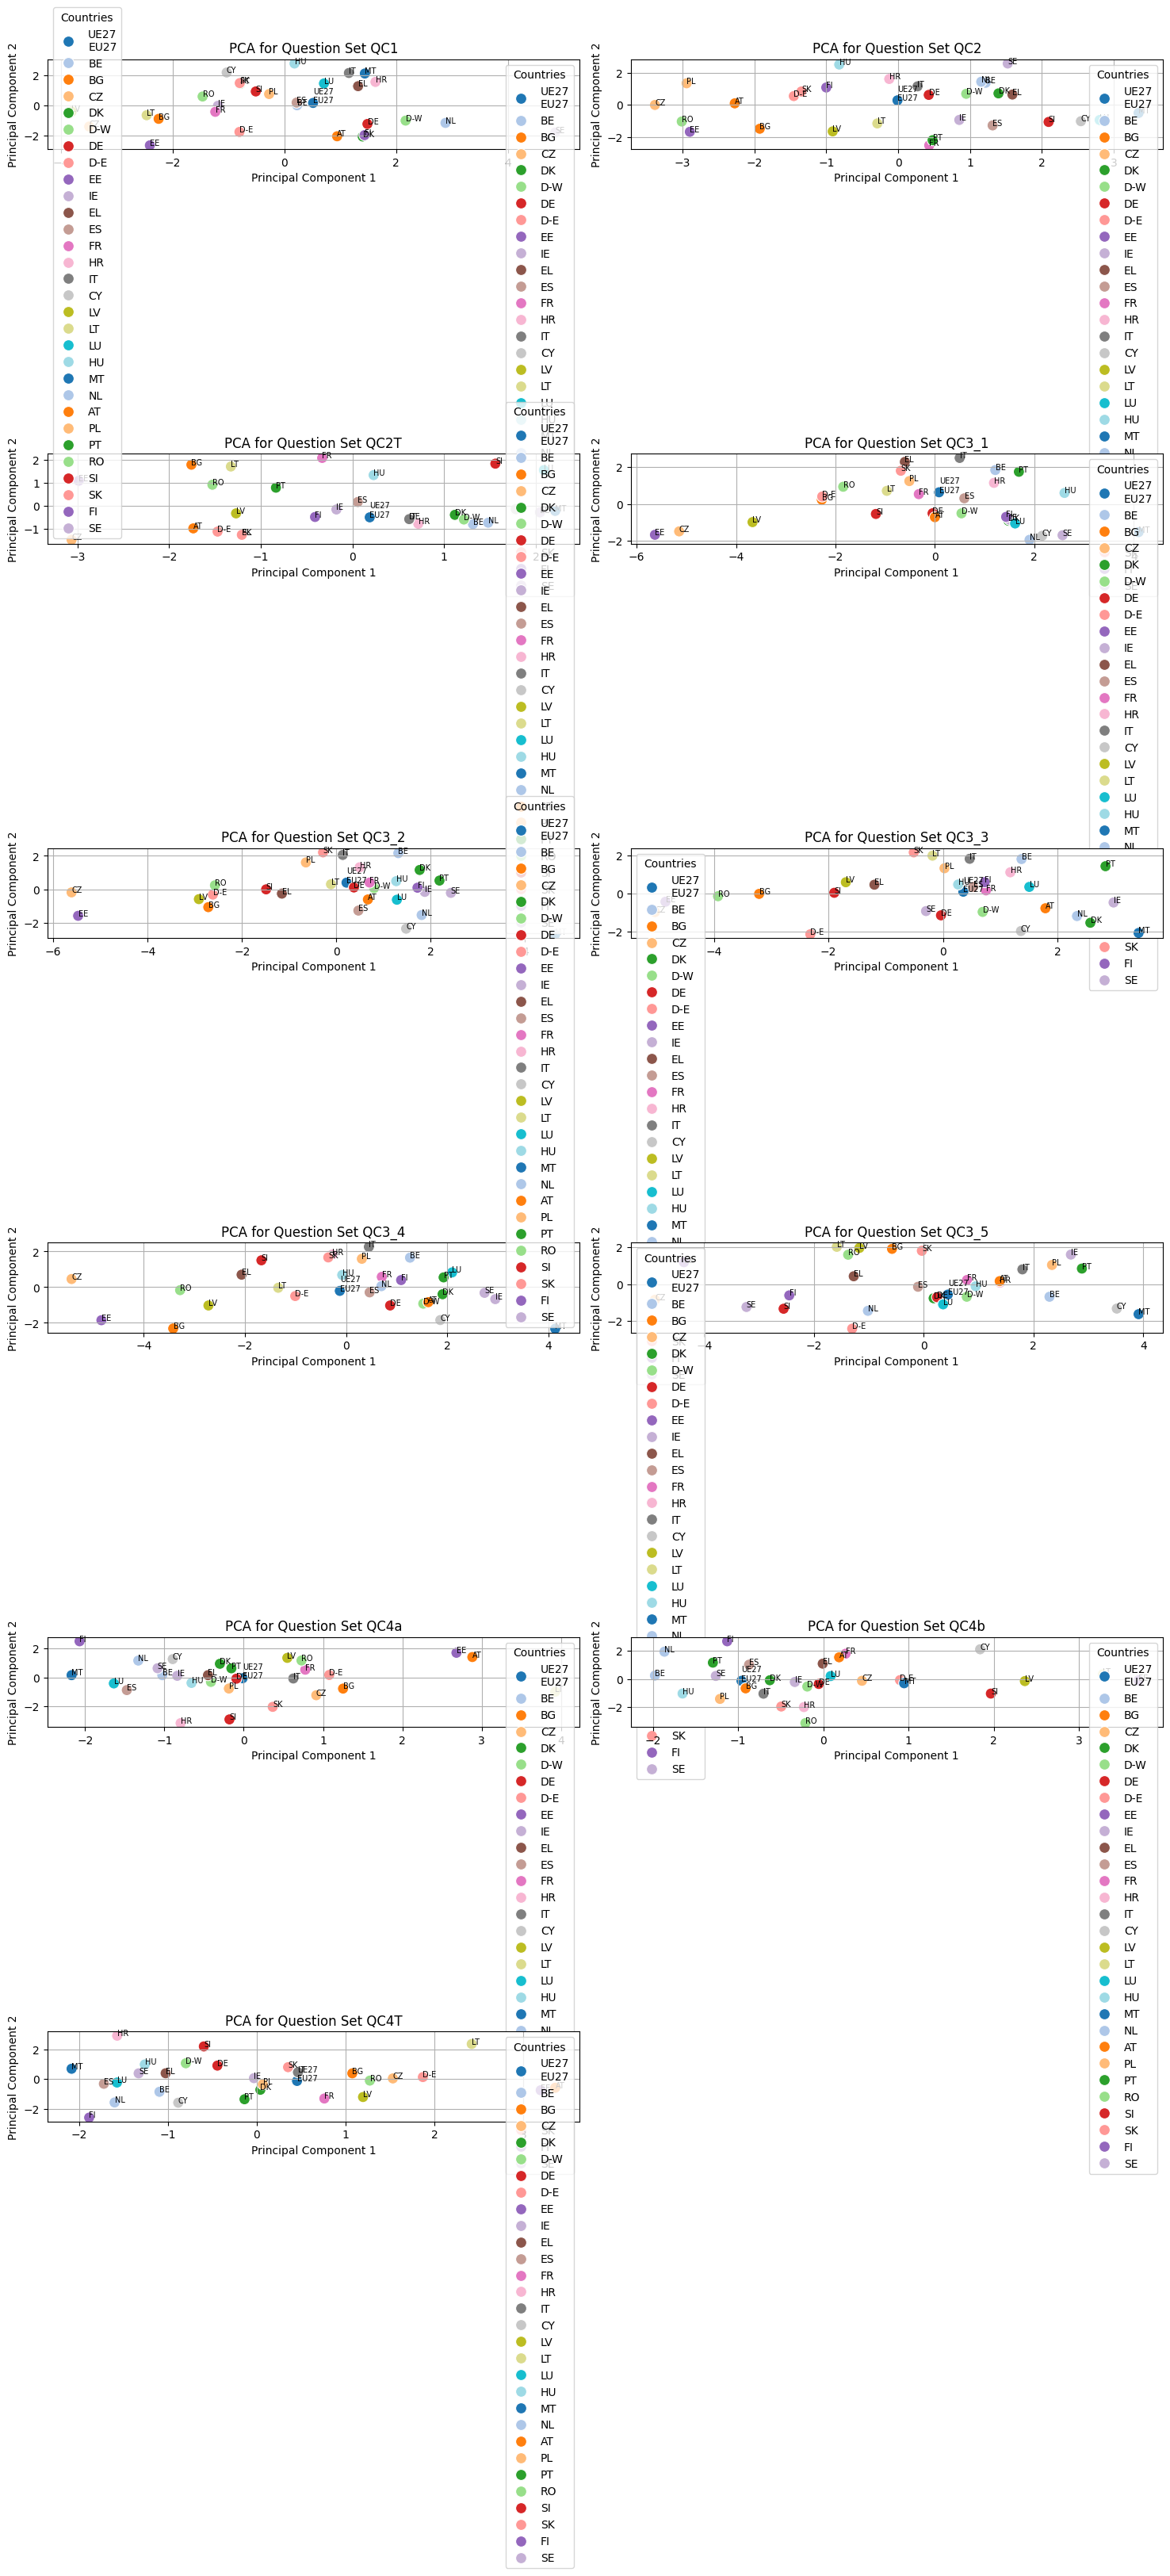

In [ ]:
#print(all_pca_question_df)
pca_data = all_pca_countries_df
# Determine subplot grid size
num_plots = len(pca_data)
cols = 2  # Define number of columns
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calculate rows dynamically

plt.figure(figsize=(15, 5 * rows))  # Adjust height based on number of rows

for i, pca_df in enumerate(pca_data):  # Enumerate for index and dataframe
    
    plt.subplot(rows, cols, i + 1)  # Create subplot (1-based index)
    
    # Scatter plot of PC1 vs PC2
    sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=pca_df["Countries"], 
                    palette="tab20", s=100, legend=False)

    # Add labels, title, and grid
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f"PCA for Question Set {sheet_names[i]}")
    plt.grid(True)

    # Adjust legend
    #plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=1, fontsize='small')
    for i in range(pca_df.shape[0]):
        plt.text(pca_df["PC1"][i], pca_df["PC2"][i], pca_df["Countries"][i], fontsize=7)

plt.tight_layout()  # Avoid overlapping
plt.show()
